# Tutorial

Tutorial on how to use the Imbalance Quantification (Imbaqu) library.

## Downloading and installing
Download the package from GitHub, nativate to the `setup.py` and install it using pip.

In [1]:
# !pip install .

In [2]:
import numpy as np
import pandas as pd
import imbaqu
import scipy.stats
import matplotlib.pyplot as plt
np.random.seed(1)

## Create Dataset
This dataset is just created for demonstated purposes. Substitute it by your own data.

In [3]:
# create dataset with two continuous and one categorical variable.
numerical_data = pd.DataFrame(data = np.random.normal(size = (1000,2)), columns = ['num1', 'num2'])
categorical_data = pd.DataFrame(data = np.random.choice([1,2], size=1000), columns= ['cat1'])
categorical_data = categorical_data.astype('category')
data = pd.concat([numerical_data, categorical_data], axis = 1)
data

,num1,num2,cat1
0,1.624345,-0.611756,2
1,-0.528172,-1.072969,2
2,0.865408,-2.301539,1
3,1.744812,-0.761207,1
4,0.319039,-0.249370,1
...,...,...,...
995,-0.430770,0.944285,2
996,-0.472876,-1.407064,1
997,-0.447473,0.188583,2
998,0.560918,-0.921659,1


## Usa of the imbaqu package


###  Example considering a uniform relevance distribution
#### Calculate mIR and Imbalance percentage of a single variable

In [4]:
# mIR continuous
mir = imbaqu.mean_imbalance_ratio(data['num1'])
print(f'mIR of a continuous variable: {mir:.2f}')

# mIR discrete
mir = imbaqu.mean_imbalance_ratio(data['cat1'], discrete=True)
print(f'mIR of a discrete variable: {mir:.2f}')

mIR of a continuous variable: 2.19
mIR of a discrete variable: 1.07


In [5]:
# SIP continuous
sip = imbaqu.imbalanced_sample_percentage(data['num1'],
                                          ir_bound= 2)
print(f'SIP of a continuous variable: {sip:.2f} %')
# SIP_l continuous
sip = imbaqu.imbalanced_sample_percentage(data['num1'],
                                          lower_bound = 0.5)
print(f'SIP under the lower bound: {sip:.2f} %')
# SIP_u continuous
sip = imbaqu.imbalanced_sample_percentage(data['num1'],
                                          upper_bound = 2)
print(f'SIP over the upper bound: {sip:.2f} %')

SIP of a continuous variable: 55.80 %
SIP under the lower bound: 6.90 %
SIP over the upper bound: 48.90 %


### Calculate mIR and imbalance percentage of a multivariate dataset

In [6]:
# mIR continuous
mir = imbaqu.mean_imbalance_ratio(data[['num1', 'num2']])
print(f'mIR_2 of a two continuous variables: {mir:.2f}')

# mir mixed
categorical_mask = (data.dtypes == 'category').to_list()
print(f'{categorical_mask=}')
mir = imbaqu.mean_imbalance_ratio(data, discrete= categorical_mask)
print(f'mIR_{len(data.columns)} of the dataset: {mir:.2f}')

mIR_2 of a two continuous variables: 1.91
categorical_mask=[False, False, True]
mIR_3 of the dataset: 1.53


### Example considering a custom relevance distribution
#### Calculate mIR and Imbalance percentage of a single variable

In [7]:
def relevance_distribution_function(x):
    
    if abs(x) > 3:
        return 1E-6
    else:
        return 1/18*x +3/18


Exemplary plot of the data distribution and the relevance distribution:

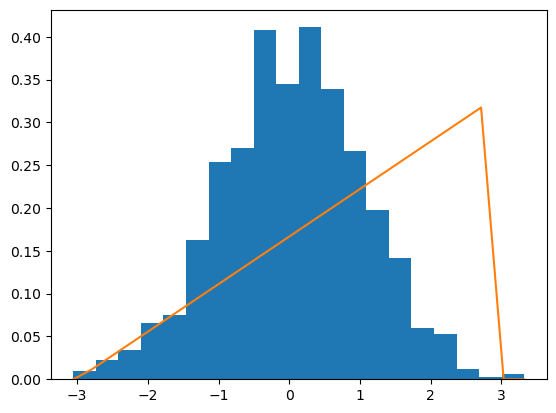

In [8]:
hist = plt.hist(data['num1'], bins = 20, density= True)
line = plt.plot(data['num1'].sort_values(), data['num1'].sort_values().apply(relevance_distribution_function))

Calculate the mean imbalance ratio (mIR) of the univariate variable assuming a custom relevance distribution:

In [9]:
# mIR continuous
mir = imbaqu.mean_imbalance_ratio(data['num1'], relevance_pdf = relevance_distribution_function)
print(f'mIR of a continuous variable: {mir:.2f}')

mIR of a continuous variable: 14.37


### Calculate the mIR of a multivariate dataset using custom relevance distributions

Exemplary definition of a second relevance distribution. This example shows, that relevance distribution functions which do not return a float-type value have to be wrapped.

E.g.: Calling `scipy.stats.gaussian_kde()` returns an numpy array of shape (1,). As relevance_pdf assumes a float, it has to be transformed.

In [10]:
class RelevancePDF:
    def __init__(self, data: pd.Series) -> None:
        self.kde = scipy.stats.gaussian_kde(data)
    def __call__(self, x: float) -> float:
        return self.kde(x)[0]

In [11]:
# mIR continuous
pdf = RelevancePDF(data['num1'])
mir = imbaqu.mean_imbalance_ratio(data[['num1', 'num2']], relevance_pdf= [pdf,relevance_distribution_function])
print(f'mIR of a continuous variable: {mir:.2f}')

mIR of a continuous variable: 1.66
